# Importación de Librerías


In [57]:
#Importación de librerías
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import importlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import functions
importlib.reload(functions)

<module 'functions' from 'D:\\MAESTRIA\\1er Ciclo\\01 Aprendizaje Automatico\\Trabajo\\Github\\ML_PULSAR_CLASSIFICATION_PROJECT\\APLICACION DE ALGORITMOS\\functions.py'>

In [0]:
try:  
  #Para usar colab
  from google.colab import drive
  drive.mount('/content/drive')
  
except:  
  

In [2]:
#Lectura de datos
try:
  #Caso en que se esté usando jupyter notebooks o se encuentre los archivos de la data en el entorno de ejecución del notebook
  data_pulsar = pd.read_csv('../DATASET/HTRU_2_con_header.csv')
except:
  #Caso en que se use colab, y los archivos de la data estén en una carpeta del Drive
  dir_str ='drive/My Drive/CURSOS - MAESTRIA/APRENDIZAJE AUTOMÁTICO/MACHINE LEARNING - PROYECTO/ML_PULSAR_CLASSIFICATION_PROJECT/PREPROCESAMIENTO DE DATA/HTRU_2_sin_header.csv'
  #Se definen  los headers
  head = ['mean_IP', 'std_IP','kurt_IP','skew_IP','mean_DM', 'std_DM','kurt_DM','skew_DM','is_pulsar']
  #Lectura de la data
  data_pulsar = pd.read_csv(dir_str,header=None, names=head)


In [3]:
 data_pulsar.head()

,mean_IP,std_IP,kurt_IP,skew_IP,mean_DM,std_DM,kurt_DM,skew_DM,is_pulsar
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


# Normalización de la data

Ejecutamos la normalización del dataset.

In [4]:
head = ['mean_IP', 'std_IP','kurt_IP','skew_IP','mean_DM', 'std_DM','kurt_DM','skew_DM','is_pulsar']
scaler = MinMaxScaler()
scaler.fit(data_pulsar)
data_pulsar_scaled = pd.DataFrame(scaler.transform(data_pulsar), columns =head)
data_pulsar_scaled.describe()

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,mean_IP,std_IP,kurt_IP,skew_IP,mean_DM,std_DM,kurt_DM,skew_DM,is_pulsar
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,0.563516,0.294263,0.236676,0.050966,0.055566,0.183555,0.303691,0.089553,0.091574
std,0.137325,0.092467,0.106987,0.088247,0.132059,0.188537,0.119591,0.089285,0.288432
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.509180,0.237869,0.191353,0.022939,0.007661,0.068430,0.236757,0.030962,0.000000
50%,0.584919,0.299640,0.211075,0.028480,0.011599,0.107395,0.307141,0.071285,0.000000
75%,0.649199,0.354712,0.236220,0.038912,0.023528,0.203905,0.367371,0.118432,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Realizamos la partición de la data de entrenamiento, validación y test.

In [5]:
#Partición de la data normalizada
X_sca = data_pulsar_scaled.drop(columns=["is_pulsar"])
y_sca = data_pulsar_scaled["is_pulsar"]

X_trainval_sca, X_test_sca, y_trainval_sca, y_test_sca = train_test_split(X_sca, y_sca, test_size=0.15, random_state=0) #random_state = 0, para mantener la particion
X_train_sca, X_val_sca, y_train_sca, y_val_sca = train_test_split(X_trainval_sca, y_trainval_sca, test_size=0.2, random_state=0)


# Análisis de Algoritmos con Data Normalizada

## 1° Algoritmo: Random Forest
Realizamos el primer análisis con la data normalizada utilizando el algoritmo RandomForest.

El MSE para el modelo RandomForestClassifier es:  0.02201774564574433
El accuracy para el modelo RandomForestClassifier es:  0.9779822543542557
La precisión para el modelo RandomForestClassifier es:  0.9344262295081968
El recall para el modelo RandomForestClassifier es:  0.8172043010752689
El F1-score para el modelo RandomForestClassifier es:  0.8718929254302105
El G-mean para el modelo RandomForestClassifier es:  0.8738518946547205


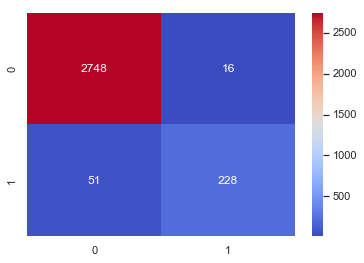

In [59]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF_model.fit(X_train_sca, y_train_sca)
functions.eval_model(RF_model, X_val_sca, y_val_sca)

In [60]:
#Aplicamos GridSearch para encontrar los mejores hiperparámetros del modelo
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

RF_grid_param = {  
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3]
}
RF_gd = GridSearchCV(estimator=RF_model,  
                     param_grid=RF_grid_param,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)
RF_gd.fit(X_train_sca, y_train_sca)  

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [50, 100, 200], 'criterion': ['gini', 'entropy'], 'max_depth': [2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [8]:
#Obtenemos los mejores parámetros
RF_gd.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 100}

El MSE para el modelo RandomForestClassifier es:  0.020046007229707525
El accuracy para el modelo RandomForestClassifier es:  0.9799539927702925
La precisión para el modelo RandomForestClassifier es:  0.9291338582677166
El recall para el modelo RandomForestClassifier es:  0.8458781362007168
El F1-score para el modelo RandomForestClassifier es:  0.8855534709193245
El G-mean para el modelo RandomForestClassifier es:  0.8865291965369652


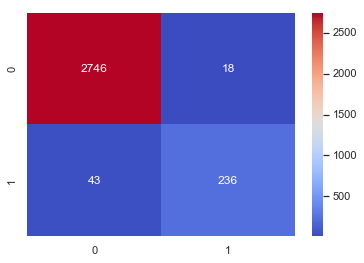

In [61]:
#Evaluamos el mejor estimador
functions.eval_model(RF_gd.best_estimator_, X_val_sca, y_val_sca)

## 2° Algoritmo: SVM
El segundo algoritmo es SVM.

El MSE para el modelo SVC es:  0.025303976339139007
El accuracy para el modelo SVC es:  0.9746960236608609
La precisión para el modelo SVC es:  0.9508928571428571
El recall para el modelo SVC es:  0.7634408602150538
El F1-score para el modelo SVC es:  0.8469184890656063
El G-mean para el modelo SVC es:  0.8520272653087417


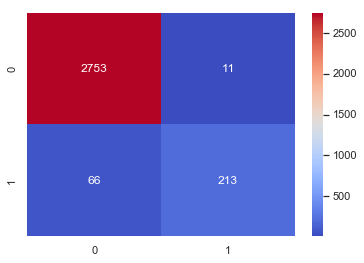

In [62]:
from sklearn.svm import SVC

SVM_model = SVC(gamma='auto',kernel='rbf')
SVM_model.fit(X_train_sca, y_train_sca)
functions.eval_model(SVM_model, X_val_sca, y_val_sca)

In [12]:
#Array de hiperparámetros para testear con GridSearch
SVM_grid_param = {  
    'C': [1, 10, 100],
    'gamma': ['auto',0.01, 0.0001],
    'kernel': ['rbf']
}

In [17]:
SVM_gd_sr2 = GridSearchCV(estimator=SVM_model,  
                     param_grid=SVM_grid_param,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)
SVM_gd_sr2.fit(X_train_sca, y_train_sca)  

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [1, 10, 100], 'gamma': ['auto', 0.01, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [18]:
#Mejores hiperparámetros
SVM_gd_sr2.best_params_

{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}

El MSE para el modelo SVC es:  0.019717384160368057
El accuracy para el modelo SVC es:  0.9802826158396319
La precisión para el modelo SVC es:  0.9362549800796812
El recall para el modelo SVC es:  0.8422939068100358
El F1-score para el modelo SVC es:  0.8867924528301886
El G-mean para el modelo SVC es:  0.8880325810135948


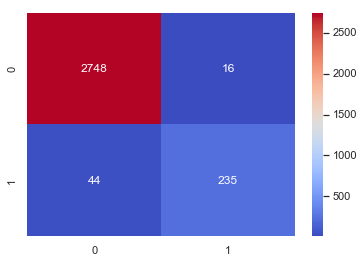

In [63]:
#Evaluación del mejor estimador
functions.eval_model(SVM_gd_sr2.best_estimator_, X_val_sca, y_val_sca)

## 3° Algoritmo: KNN

El MSE para el modelo KNeighborsClassifier es:  0.020046007229707525
El accuracy para el modelo KNeighborsClassifier es:  0.9799539927702925
La precisión para el modelo KNeighborsClassifier es:  0.9291338582677166
El recall para el modelo KNeighborsClassifier es:  0.8458781362007168
El F1-score para el modelo KNeighborsClassifier es:  0.8855534709193245
El G-mean para el modelo KNeighborsClassifier es:  0.8865291965369652


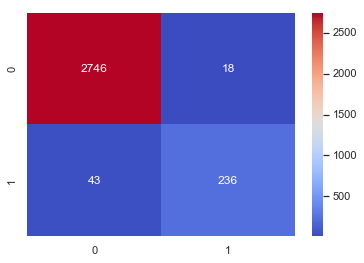

In [64]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train_sca, y_train_sca)
functions.eval_model(KNN_model, X_val_sca, y_val_sca)

In [37]:
#Array con los hiperparámetros para ser testeado con ayuda de GridSearch
KNN_grid_param = {  
    'n_neighbors': [3,5,11,19],
    'weights': ['uniform','distance'],
    'p': [1,2]
}
KNN_gd_sr = GridSearchCV(estimator=KNN_model,  
                     param_grid=KNN_grid_param,
                     scoring='f1',
                     cv=20,
                     n_jobs=-1)
KNN_gd_sr.fit(X_train_sca, y_train_sca)  

GridSearchCV(cv=20, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [3, 5, 11, 19], 'weights': ['uniform', 'distance'], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [38]:
#Obtenemos los mejors hiperparámetros
KNN_gd_sr.best_params_

{'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

El MSE para el modelo KNeighborsClassifier es:  0.020046007229707525
El accuracy para el modelo KNeighborsClassifier es:  0.9799539927702925
La precisión para el modelo KNeighborsClassifier es:  0.9291338582677166
El recall para el modelo KNeighborsClassifier es:  0.8458781362007168
El F1-score para el modelo KNeighborsClassifier es:  0.8855534709193245
El G-mean para el modelo KNeighborsClassifier es:  0.8865291965369652


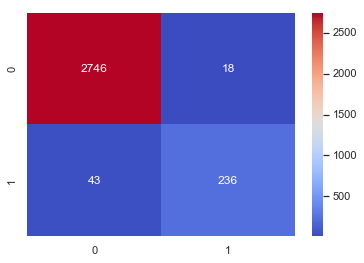

In [65]:
#Evaluamos el mejor estimador
functions.eval_model(KNN_gd_sr.best_estimator_, X_val_sca, y_val_sca)

## 4° Algoritmo: Red Neuronal

El MSE para el modelo MLPClassifier es:  0.018402891883010187
El accuracy para el modelo MLPClassifier es:  0.9815971081169899
La precisión para el modelo MLPClassifier es:  0.9372549019607843
El recall para el modelo MLPClassifier es:  0.8566308243727598
El F1-score para el modelo MLPClassifier es:  0.8951310861423221
El G-mean para el modelo MLPClassifier es:  0.8960365167302484


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


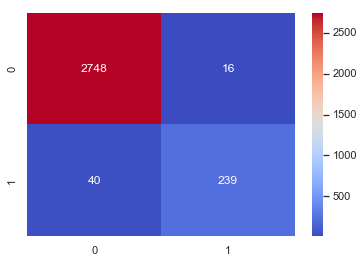

In [66]:
from sklearn.neural_network import MLPClassifier

NN_model = MLPClassifier()
NN_model.fit(X_train_sca, y_train_sca)
functions.eval_model(NN_model, X_val_sca, y_val_sca)

In [29]:
#Evaluamos con GridSearch para obtener los mejores hiperparámetros
from sklearn.model_selection import GridSearchCV
NN_grid_param = {  
    'activation':['identity','logistic','tanh','relu'],
    'solver': ['lbfgs','sgd','adam']
}
NN_gd_sr = GridSearchCV(estimator=NN_model,  
                     param_grid=NN_grid_param,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)
NN_gd_sr.fit(X_train_sca, y_train_sca)  

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [30]:
#Mejores hiperparámetros
NN_gd_sr.best_params_

{'activation': 'logistic', 'solver': 'lbfgs'}

El MSE para el modelo MLPClassifier es:  0.018402891883010187
El accuracy para el modelo MLPClassifier es:  0.9815971081169899
La precisión para el modelo MLPClassifier es:  0.933852140077821
El recall para el modelo MLPClassifier es:  0.8602150537634409
El F1-score para el modelo MLPClassifier es:  0.8955223880597015
El G-mean para el modelo MLPClassifier es:  0.8962776739851033


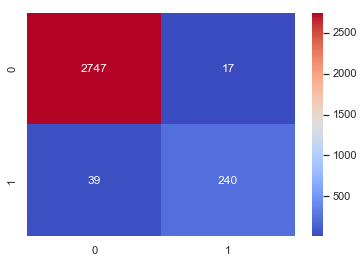

In [67]:
#Evaluación del mejor estimador
functions.eval_model(NN_gd_sr.best_estimator_, X_val_sca, y_val_sca)

#  Análisis de Algoritmos con Data Normalizada y Balanceada

## Aplicación de SVMSMOTE


Variante del algoritmo SMOTE que utiliza un algoritmo SVM para detectar la muestra que se usará para generar nuevas muestras sintéticas, utiliza un clasificador SVM para encontrar vectores de soporte y generar las muestras.

*Referencia: https://imbalanced-learn.readthedocs.io/en/latest/generated/imblearn.over_sampling.SVMSMOTE.html#imblearn.over_sampling.SVMSMOTE*

Dado que el conjunto de datos presenta un problema de desbalance de datos, se decidi aplicar la técnica de over-sampling SVMSMOTE.

Aplicamos SVMSMOTE en el conjunto de entrenamiento.

Como en la sección anterior, se aplicará a cada algoritmo GridSearch para obtener los mejores hiperparámetros.

In [16]:
#Fuente: https://imbalanced-learn.readthedocs.io/en/latest/generated/imblearn.over_sampling.SVMSMOTE.html#r88acb9955f91-2
from imblearn.over_sampling import SVMSMOTE
smt = SVMSMOTE(random_state=12)
X_resampled, y_resampled = smt.fit_resample(X_train_sca, y_train_sca)
X_train_svmsmote = pd.DataFrame(X_resampled)
y_train_svmsmote = pd.Series(y_resampled)

In [17]:
print("* Antes del proceso de over-sampling, se tiene {} valores de la clase '1'".format(sum(y_train_sca==1)))
print("* Antes del proceso de over-sampling, se tiene {} valores de la clase '0'\n".format(sum(y_train_sca==0)))


print("* Después del proceso de over-sampling, se tiene {} valores de la clase '1'".format(sum(y_train_svmsmote==1)))
print("* Después del proceso de over-sampling, se tiene {} valores de la clase '0'".format(sum(y_train_svmsmote==0)))

* Antes del proceso de over-sampling, se tiene 1150 valores de la clase '1'
* Antes del proceso de over-sampling, se tiene 11020 valores de la clase '0'

* Después del proceso de over-sampling, se tiene 11020 valores de la clase '1'
* Después del proceso de over-sampling, se tiene 11020 valores de la clase '0'


In [18]:
from imblearn.over_sampling import BorderlineSMOTE
bls = BorderlineSMOTE()
X_resampled, y_resampled = bls.fit_resample(X_train_sca, y_train_sca)
X_train_blsmote = pd.DataFrame(X_resampled)
y_train_blsmote  = pd.Series(y_resampled)

In [19]:
print("* Antes del proceso de over-sampling, se tiene {} valores de la clase '1'".format(sum(y_train_sca==1)))
print("* Antes del proceso de over-sampling, se tiene {} valores de la clase '0'\n".format(sum(y_train_sca==0)))


print("* Después del proceso de over-sampling, se tiene {} valores de la clase '1'".format(sum(y_train_blsmote==1)))
print("* Después del proceso de over-sampling, se tiene {} valores de la clase '0'".format(sum(y_train_blsmote==0)))

* Antes del proceso de over-sampling, se tiene 1150 valores de la clase '1'
* Antes del proceso de over-sampling, se tiene 11020 valores de la clase '0'

* Después del proceso de over-sampling, se tiene 11020 valores de la clase '1'
* Después del proceso de over-sampling, se tiene 11020 valores de la clase '0'


## 1° Algoritmo: Random Forest

El MSE para el modelo RandomForestClassifier es:  0.057837660203746304
El accuracy para el modelo RandomForestClassifier es:  0.9421623397962537
El precision para el modelo RandomForestClassifier es:  0.6235011990407674
El recall para el modelo RandomForestClassifier es:  0.931899641577061
El F1-score para el modelo RandomForestClassifier es:  0.7471264367816092


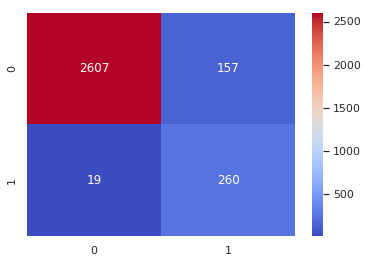

In [56]:
from sklearn.ensemble import RandomForestClassifier

RF_model_sm = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF_model_sm.fit(X_train_svmsmote, y_train_svmsmote)
functions.eval_model(RF_model_sm, X_val_sca, y_val_sca)

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

RF_grid_param = {  
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3]
}

In [74]:
RF_gd_sr = GridSearchCV(estimator=RF_model_sm,  
                     param_grid=RF_grid_param,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)
RF_gd_sr.fit(X_train_svmsmote, y_train_svmsmote)  

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=2,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'criterion

In [82]:
RF_gd_sr.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 100}

El MSE para el modelo RandomForestClassifier es:  0.05816628327308577
El accuracy para el modelo RandomForestClassifier es:  0.9418337167269142
El precision para el modelo RandomForestClassifier es:  0.6202830188679245
El recall para el modelo RandomForestClassifier es:  0.942652329749104
El F1-score para el modelo RandomForestClassifier es:  0.7482219061166429


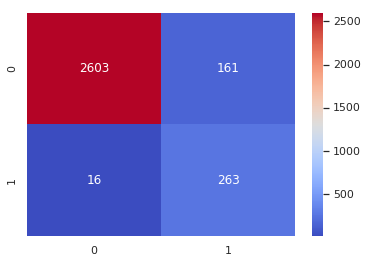

In [83]:
functions.eval_model(RF_gd_sr.best_estimator_, X_val_sca, y_val_sca)

## 2° Algoritmo: SVM

El MSE para el modelo SVC es:  0.05718041406506737
El accuracy para el modelo SVC es:  0.9428195859349326
El precision para el modelo SVC es:  0.624113475177305
El recall para el modelo SVC es:  0.946236559139785
El F1-score para el modelo SVC es:  0.7521367521367522


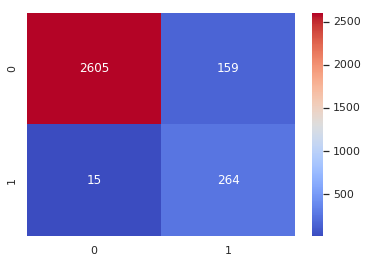

In [59]:
from sklearn.svm import SVC

SVM_model_sm = SVC(gamma='auto',kernel='rbf')
SVM_model_sm.fit(X_train_svmsmote, y_train_svmsmote)
functions.eval_model(SVM_model_sm, X_val_sca, y_val_sca)

In [0]:
SVM_grid_param = {  
    'C': [1, 10, 100],
    'gamma': ['auto',0.01, 0.0001],
    'kernel': ['rbf']
}

In [79]:
SVM_gd_sr = GridSearchCV(estimator=SVM_model_sm,  
                     param_grid=SVM_grid_param,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)
SVM_gd_sr.fit(X_train_svmsmote, y_train_svmsmote)  

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': ['auto', 0.01, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

El MSE para el modelo SVC es:  0.038777522182057184
El accuracy para el modelo SVC es:  0.9612224778179428
El precision para el modelo SVC es:  0.7169811320754716
El recall para el modelo SVC es:  0.953405017921147
El F1-score para el modelo SVC es:  0.8184615384615385


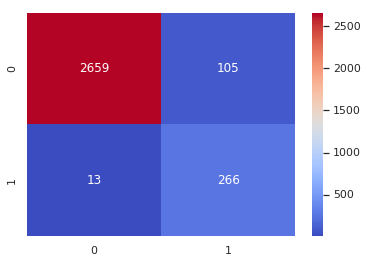

In [80]:
functions.eval_model(SVM_gd_sr.best_estimator_, X_val_sca, y_val_sca)

In [81]:
SVM_gd_sr.best_params_

{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}

## 3° Algoritmo: KNN

El MSE para el modelo KNeighborsClassifier es:  0.03812027604337825
El accuracy para el modelo KNeighborsClassifier es:  0.9618797239566218
La precisión para el modelo KNeighborsClassifier es:  0.7282913165266106
El recall para el modelo KNeighborsClassifier es:  0.931899641577061
El F1-score para el modelo KNeighborsClassifier es:  0.8176100628930817


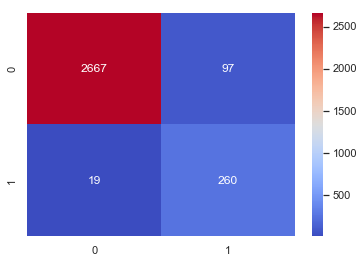

In [20]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model_sm = KNeighborsClassifier(n_neighbors=5)
KNN_model_sm.fit(X_train_svmsmote, y_train_svmsmote)
functions.eval_model(KNN_model_sm, X_val_sca, y_val_sca)

In [22]:
KNN_grid_param2 = {  
    'n_neighbors': [3,5,11,19],
    'weights': ['uniform','distance'],
    'p': [1,2]
}
KNN_gd_sr2 = GridSearchCV(estimator=KNN_model_sm,  
                     param_grid=KNN_grid_param2,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)
KNN_gd_sr2.fit(X_train_svmsmote, y_train_svmsmote)  

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [3, 5, 11, 19], 'weights': ['uniform', 'distance'], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [23]:
KNN_gd_sr2.best_params_

{'n_neighbors': 11, 'p': 1, 'weights': 'distance'}

El MSE para el modelo KNeighborsClassifier es:  0.047650345054222804
El accuracy para el modelo KNeighborsClassifier es:  0.9523496549457772
La precisión para el modelo KNeighborsClassifier es:  0.6744791666666666
El recall para el modelo KNeighborsClassifier es:  0.9283154121863799
El F1-score para el modelo KNeighborsClassifier es:  0.7812971342383106


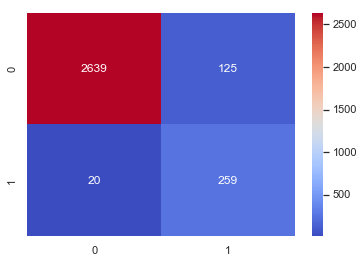

In [24]:
functions.eval_model(KNN_gd_sr2.best_estimator_, X_val_sca, y_val_sca)

## 4° Algoritmo: Red Neuronal

El MSE para el modelo MLPClassifier es:  0.05126519881695695
El accuracy para el modelo MLPClassifier es:  0.9487348011830431
La precisión para el modelo MLPClassifier es:  0.6481927710843374
El recall para el modelo MLPClassifier es:  0.96415770609319
El F1-score para el modelo MLPClassifier es:  0.7752161383285302


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


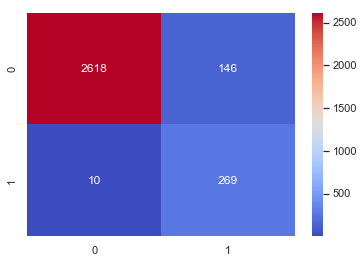

In [25]:
from sklearn.neural_network import MLPClassifier

NN_model_sm = MLPClassifier()
NN_model_sm.fit(X_train_svmsmote, y_train_svmsmote)
functions.eval_model(NN_model_sm, X_val_sca, y_val_sca)

In [26]:
from sklearn.model_selection import GridSearchCV
NN_grid_param2 = {  
    'activation':['identity','logistic','tanh','relu'],
    'solver': ['lbfgs','sgd','adam']
}
NN_gd_sr2 = GridSearchCV(estimator=NN_model_sm,  
                     param_grid=NN_grid_param2,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)
NN_gd_sr2.fit(X_train_svmsmote, y_train_svmsmote)  

C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [27]:
NN_gd_sr2.best_params_

{'activation': 'relu', 'solver': 'adam'}

El MSE para el modelo MLPClassifier es:  0.051593821886296416
El accuracy para el modelo MLPClassifier es:  0.9484061781137035
La precisión para el modelo MLPClassifier es:  0.6466346153846154
El recall para el modelo MLPClassifier es:  0.96415770609319
El F1-score para el modelo MLPClassifier es:  0.7741007194244605


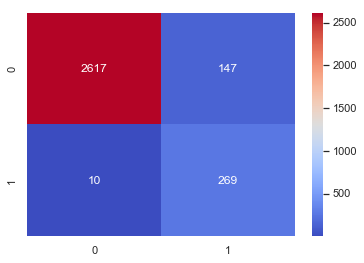

In [28]:
functions.eval_model(NN_gd_sr2.best_estimator_, X_val_sca, y_val_sca)

# Evaluación de los mejores clasificadores en la data de testing

El MSE para el modelo RandomForestClassifier es:  0.01675977653631285
El accuracy para el modelo RandomForestClassifier es:  0.9832402234636871
La precisión para el modelo RandomForestClassifier es:  0.9319371727748691
El recall para el modelo RandomForestClassifier es:  0.8476190476190476
El F1-score para el modelo RandomForestClassifier es:  0.8877805486284288
El G-mean para el modelo RandomForestClassifier es:  0.8887787682141278


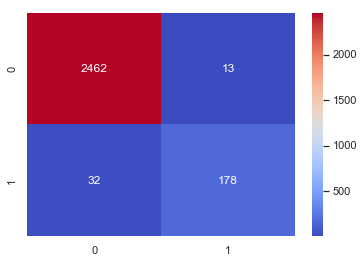

In [68]:
#RF - Evaluamos el mejor estimador con la data de test
functions.eval_model(RF_gd.best_estimator_, X_test_sca, y_test_sca)

El MSE para el modelo SVC es:  0.01675977653631285
El accuracy para el modelo SVC es:  0.9832402234636871
La precisión para el modelo SVC es:  0.927461139896373
El recall para el modelo SVC es:  0.8523809523809524
El F1-score para el modelo SVC es:  0.8883374689826303
El G-mean para el modelo SVC es:  0.8891289050082638


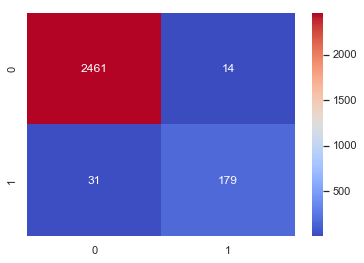

In [69]:
#Evaluamos el mejor estimador con la data de test
functions.eval_model(SVM_gd_sr2.best_estimator_, X_test_sca, y_test_sca)

El MSE para el modelo KNeighborsClassifier es:  0.01638733705772812
El accuracy para el modelo KNeighborsClassifier es:  0.9836126629422719
La precisión para el modelo KNeighborsClassifier es:  0.9322916666666666
El recall para el modelo KNeighborsClassifier es:  0.8523809523809524
El F1-score para el modelo KNeighborsClassifier es:  0.890547263681592
El G-mean para el modelo KNeighborsClassifier es:  0.8914413377952353


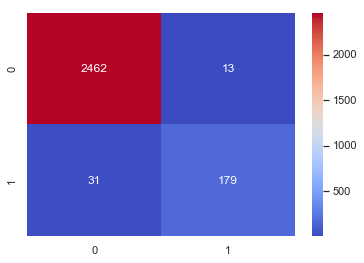

In [70]:
#Evaluamos el mejor estimador con la data de test
functions.eval_model(KNN_gd_sr.best_estimator_, X_test_sca, y_test_sca)

El MSE para el modelo MLPClassifier es:  0.01675977653631285
El accuracy para el modelo MLPClassifier es:  0.9832402234636871
La precisión para el modelo MLPClassifier es:  0.9319371727748691
El recall para el modelo MLPClassifier es:  0.8476190476190476
El F1-score para el modelo MLPClassifier es:  0.8877805486284288
El G-mean para el modelo MLPClassifier es:  0.8887787682141278


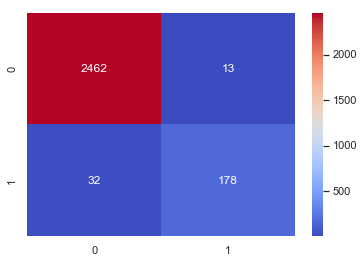

In [71]:
#Evaluamos el mejor estimador con la data de test
functions.eval_model(NN_gd_sr.best_estimator_, X_test_sca, y_test_sca)

In [36]:
X_train_sca.to_csv (r'D:\X_train_sca.csv', index = None, header=True) 
y_train_sca.to_csv (r'D:\y_train_sca.csv', index = None, header=True)
X_val_sca.to_csv (r'D:\X_val_sca.csv', index = None, header=True) 
y_val_sca.to_csv (r'D:\y_val_sca.csv', index = None, header=True)
X_test_sca.to_csv (r'D:\X_test_sca.csv', index = None, header=True) 
y_test_sca.to_csv (r'D:\y_test_sca.csv', index = None, header=True)